In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path)

data = df.head(5)

print(data)

   Major_code                                  Major  \
0        1100                    GENERAL AGRICULTURE   
1        1101  AGRICULTURE PRODUCTION AND MANAGEMENT   
2        1102                 AGRICULTURAL ECONOMICS   
3        1103                        ANIMAL SCIENCES   
4        1104                           FOOD SCIENCE   

                    Major_category   Total  Employed  \
0  Agriculture & Natural Resources  128148     90245   
1  Agriculture & Natural Resources   95326     76865   
2  Agriculture & Natural Resources   33955     26321   
3  Agriculture & Natural Resources  103549     81177   
4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423               1.89   50000   
1                          64240        2266               2.38   54000   
2                          22810         821               2.42   63000   
3                         

In [2]:
# Set visual style for seaborn
sns.set(style="whitegrid")

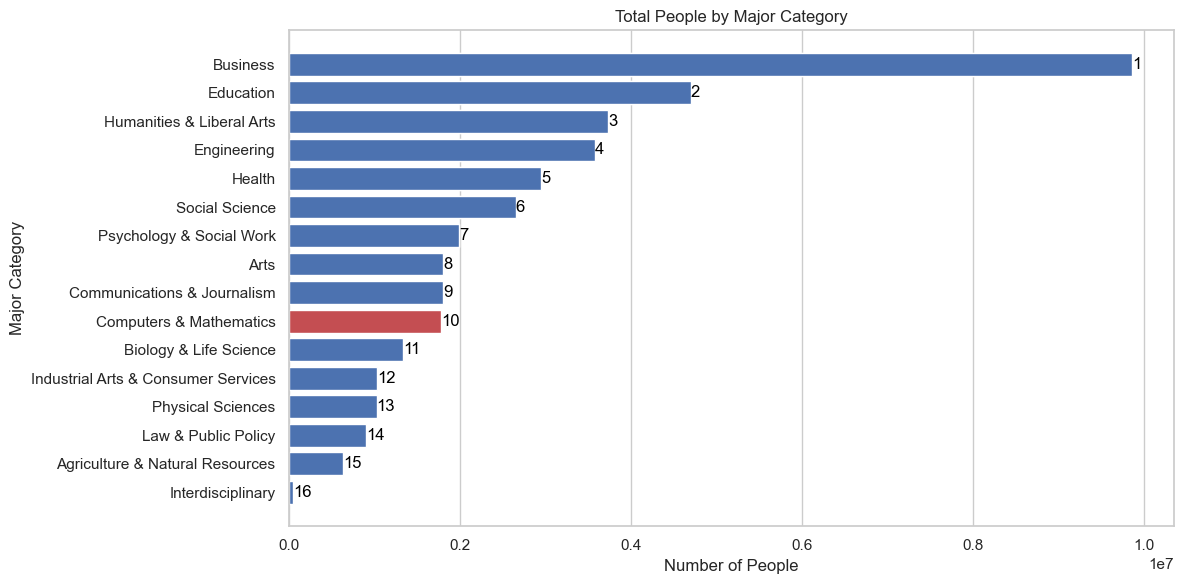

In [5]:
# Create a summary of the dataset for visualization
summary = df.groupby('Major_category').agg({
    'Total': 'sum'
}).reset_index()

# Sort the summary DataFrame by 'Total' in descending order
summary_sorted = summary.sort_values(by='Total', ascending=False)

# Define colors, highlighting "Computers & Mathematics"
colors = ['b' if major != "Computers & Mathematics" else 'r' for major in summary_sorted['Major_category']]

# Plot Total People vs Major Category in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Major_category', data=summary_sorted)

# Highlight "Computers & Mathematics" in red
for i, color in enumerate(colors):
    plt.barh(summary_sorted['Major_category'].iloc[i], summary_sorted['Total'].iloc[i], color=color)

# Add markers on the bars
for index, value in enumerate(summary_sorted['Total']):
    plt.text(value, index, str(index + 1), color='black', ha='left', va='center')

plt.title('Total People by Major Category')
plt.xlabel('Number of People')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()

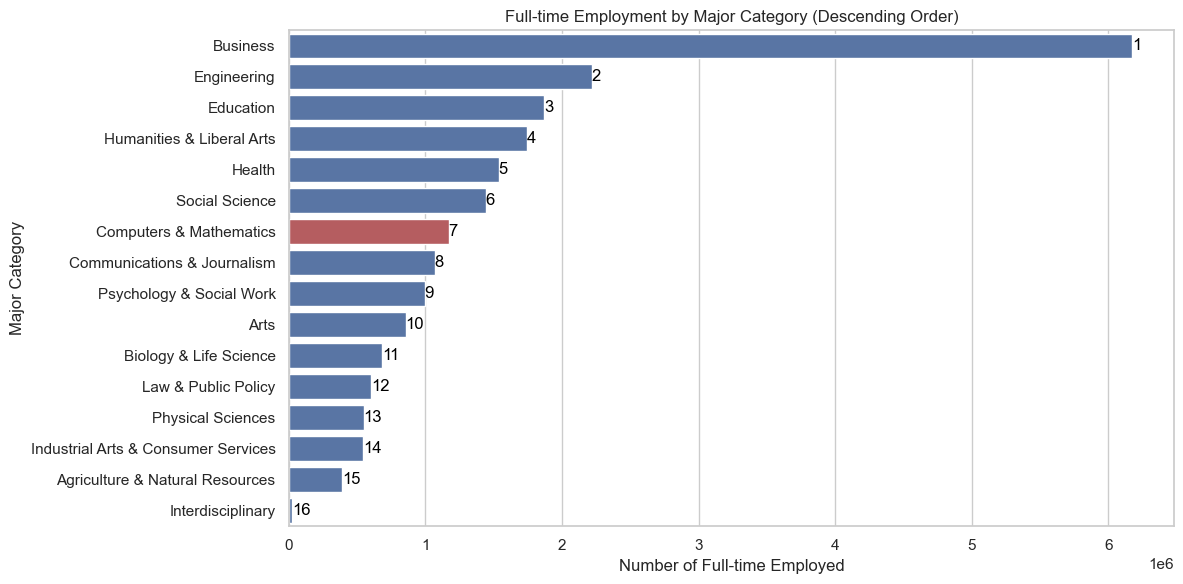

In [4]:
# Step 1: Sort the summary data by 'Employed_full_time_year_round' in descending order
summary_sorted = summary.sort_values(by='Employed_full_time_year_round', ascending=False)

# Step 2: Define colors, highlighting "Computers & Mathematics"
colors = ['b' if major != "Computers & Mathematics" else 'r' for major in summary_sorted['Major_category']]

# Step 3: Plot the sorted data
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Employed_full_time_year_round', y='Major_category', data=summary_sorted, palette=colors)

# Step 4: Add markers on the bars
for index, value in enumerate(summary_sorted['Employed_full_time_year_round']):
    plt.text(value, index, str(index + 1), color='black', ha='left', va='center')

plt.title('Full-time Employment by Major Category (Descending Order)')
plt.xlabel('Number of Full-time Employed')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Load the CSV file
file_path = 'dataset.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Step 1: Create the 'Seasonal_employment' column
df['Seasonal_employment'] = df['Total'] - df['Employed_full_time_year_round']

# Step 2: Save the updated DataFrame back to the CSV file
df.to_csv(file_path, index=False)  # Overwrite the original file

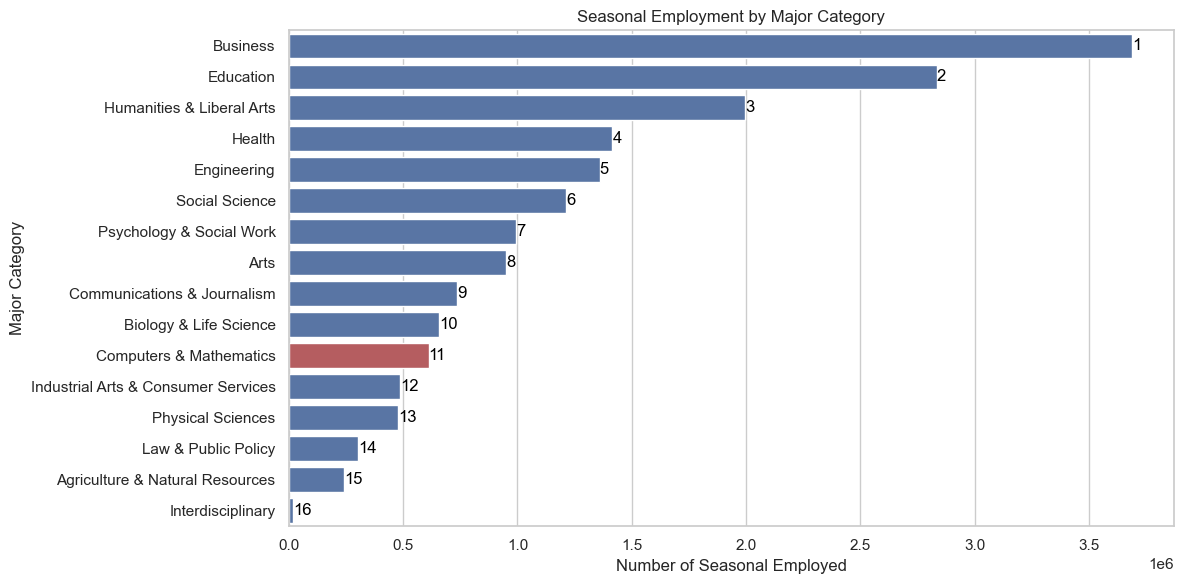

In [6]:
# Step 1: Create a summary of the dataset for visualization
summary = df.groupby('Major_category').agg({
    'Employed': 'sum',
    'Unemployed': 'sum',
    'Employed_full_time_year_round': 'sum',
    'Seasonal_employment': 'sum',  # Include Seasonal Employment
    'Total': 'sum',
    'Median': 'median'
}).reset_index()

# Step 2: Sort the summary data by 'Seasonal_employment' in descending order
summary_sorted = summary.sort_values(by='Seasonal_employment', ascending=False)

# Step 3: Define colors, highlighting "Computers & Mathematics"
colors = ['b' if major != "Computers & Mathematics" else 'r' for major in summary_sorted['Major_category']]

# Step 4: Plot the sorted data
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Seasonal_employment', y='Major_category', data=summary_sorted, palette=colors)

# Step 5: Add markers on the bars
for index, value in enumerate(summary_sorted['Seasonal_employment']):
    plt.text(value, index, str(index + 1), color='black', ha='left', va='center')

# Step 6: Customize the plot
plt.title('Seasonal Employment by Major Category')
plt.xlabel('Number of Seasonal Employed')
plt.ylabel('Major Category')
plt.tight_layout()

# Show the plot
plt.show()


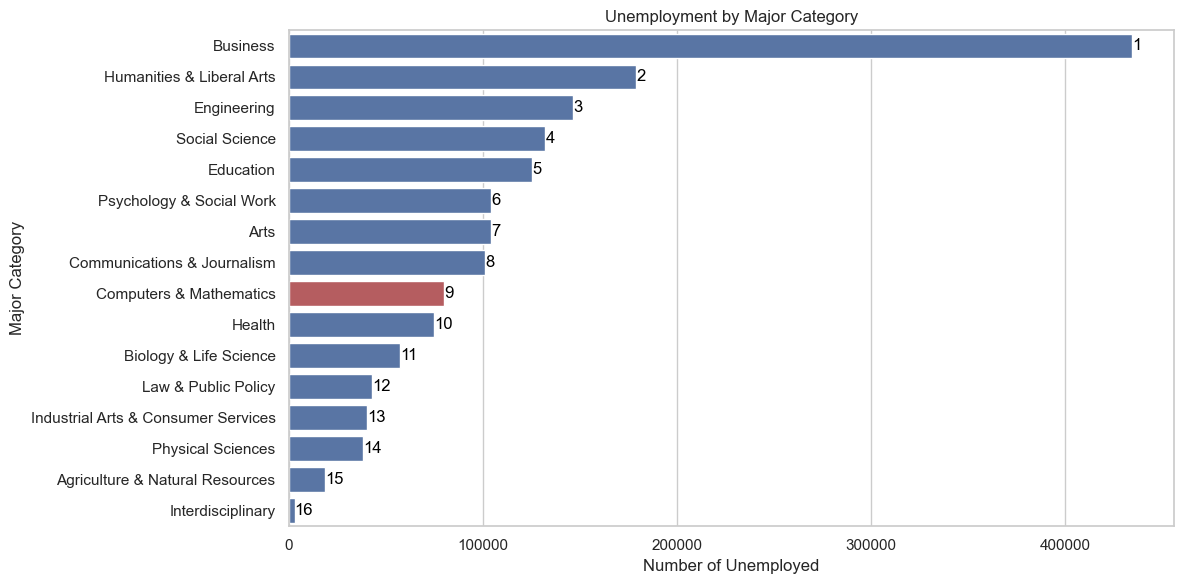

In [7]:
# Step 1: Create a summary of the dataset for visualization
summary = df.groupby('Major_category').agg({
    'Employed': 'sum',
    'Unemployed': 'sum',  # Include Unemployed data
    'Employed_full_time_year_round': 'sum',
    'Total': 'sum',
    'Median': 'median'
}).reset_index()

# Step 2: Sort the summary data by 'Unemployed' in descending order
summary_sorted = summary.sort_values(by='Unemployed', ascending=False)

# Step 3: Define colors, highlighting "Computers & Mathematics"
colors = ['b' if major != "Computers & Mathematics" else 'r' for major in summary_sorted['Major_category']]

# Step 4: Plot the sorted data
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Unemployed', y='Major_category', data=summary_sorted, palette=colors)

# Step 5: Add markers on the bars
for index, value in enumerate(summary_sorted['Unemployed']):
    plt.text(value, index, str(index + 1), color='black', ha='left', va='center')

# Step 6: Customize the plot
plt.title('Unemployment by Major Category')
plt.xlabel('Number of Unemployed')
plt.ylabel('Major Category')
plt.tight_layout()

# Show the plot
plt.show()


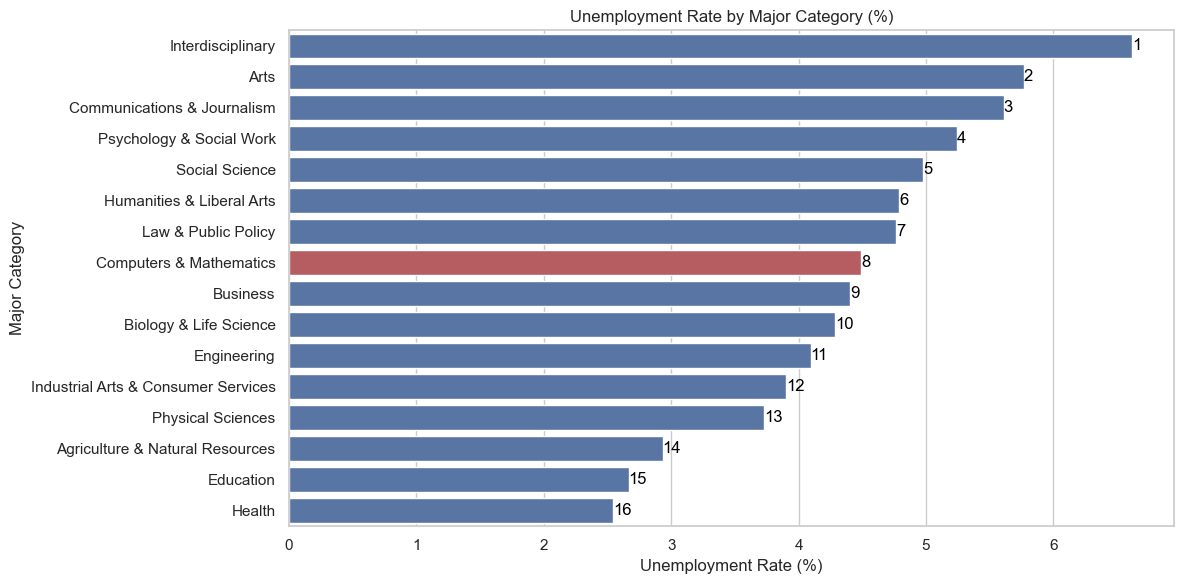

In [8]:
# Create a summary of the dataset for visualization
summary = df.groupby('Major_category').agg({
    'Employed': 'sum',
    'Unemployed': 'sum',
    'Employed_full_time_year_round': 'sum',
    'Total': 'sum',
    'Median': 'median'
}).reset_index()

# Add Unemployment rate calculation to the summary
summary['Unemployment_rate'] = (summary['Unemployed'] / summary['Total']) * 100

# Sort the summary data by 'Unemployment_rate' in ascending order
summary_sorted = summary.sort_values(by='Unemployment_rate', ascending=False)

# Define colors, highlighting "Computers & Mathematics"
colors = ['b' if major != "Computers & Mathematics" else 'r' for major in summary_sorted['Major_category']]

# Plot the sorted data
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Unemployment_rate', y='Major_category', data=summary_sorted, palette=colors)

# Add markers on the bars
for index, value in enumerate(summary_sorted['Unemployment_rate']):
    plt.text(value, index, str(index + 1), color='black', ha='left', va='center')

plt.title('Unemployment Rate by Major Category (%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()

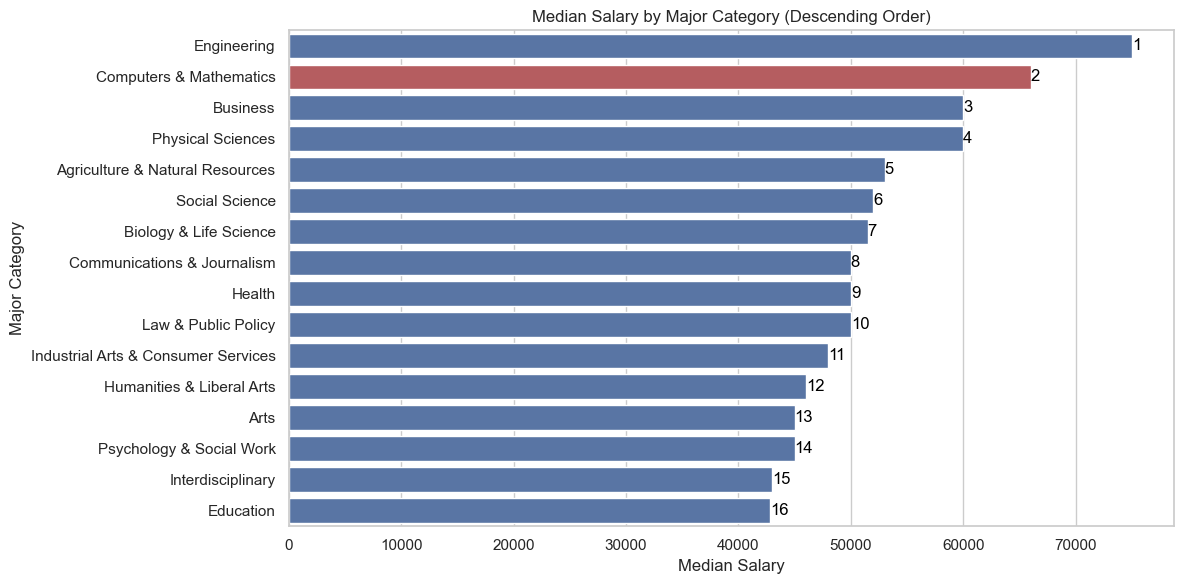

In [9]:
# Create a summary of the dataset for visualization
summary = df.groupby('Major_category').agg({
    'Employed': 'sum',
    'Unemployed': 'sum',
    'Employed_full_time_year_round': 'sum',
    'Total': 'sum',
    'Median': 'median'
}).reset_index()

# Sort the summary data by 'Median' in descending order
summary_sorted_salary = summary.sort_values(by='Median', ascending=False)

# Define colors, highlighting "Computers & Mathematics"
colors = ['b' if major != "Computers & Mathematics" else 'r' for major in summary_sorted_salary['Major_category']]

# Plot the sorted data
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Median', y='Major_category', data=summary_sorted_salary, palette=colors)

# Add markers on the bars
for index, value in enumerate(summary_sorted_salary['Median']):
    plt.text(value, index, str(index + 1), color='black', ha='left', va='center')

plt.title('Median Salary by Major Category (Descending Order)')
plt.xlabel('Median Salary')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()

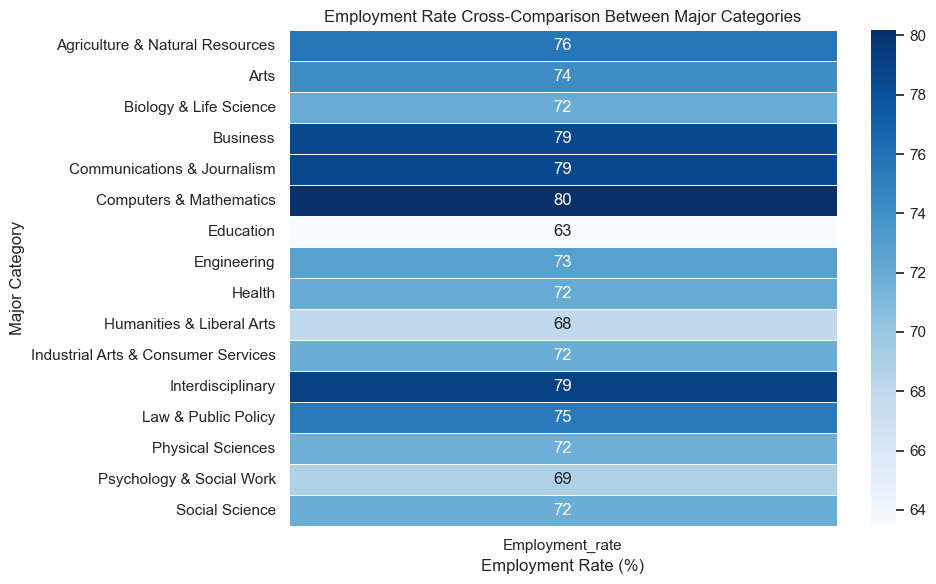


Cross-Comparison of Employment Rates Between Major Categories:
   - The heatmap shows the variation in employment rates across different major categories.
   - Categories such as Engineering and Health perform well in terms of employment rate, while majors like Arts and Humanities may face more challenges in securing employment.



In [10]:
# Calculate employment rate by major category
df['Employment_rate'] = (df['Employed'] / df['Total']) * 100

# Cross-compare employment rates across major categories
employment_comparison = df.pivot_table(values='Employment_rate', index='Major_category', aggfunc='mean')

# Plot heatmap for cross-category comparison
plt.figure(figsize=(10, 6))
sns.heatmap(employment_comparison, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Employment Rate Cross-Comparison Between Major Categories')
plt.xlabel('Employment Rate (%)')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()

# Dynamic explanation for employment rate cross-comparison
employment_rate_comparison_explanation = f"""
Cross-Comparison of Employment Rates Between Major Categories:
   - The heatmap shows the variation in employment rates across different major categories.
   - Categories such as Engineering and Health perform well in terms of employment rate, while majors like Arts and Humanities may face more challenges in securing employment.
"""
print(employment_rate_comparison_explanation)

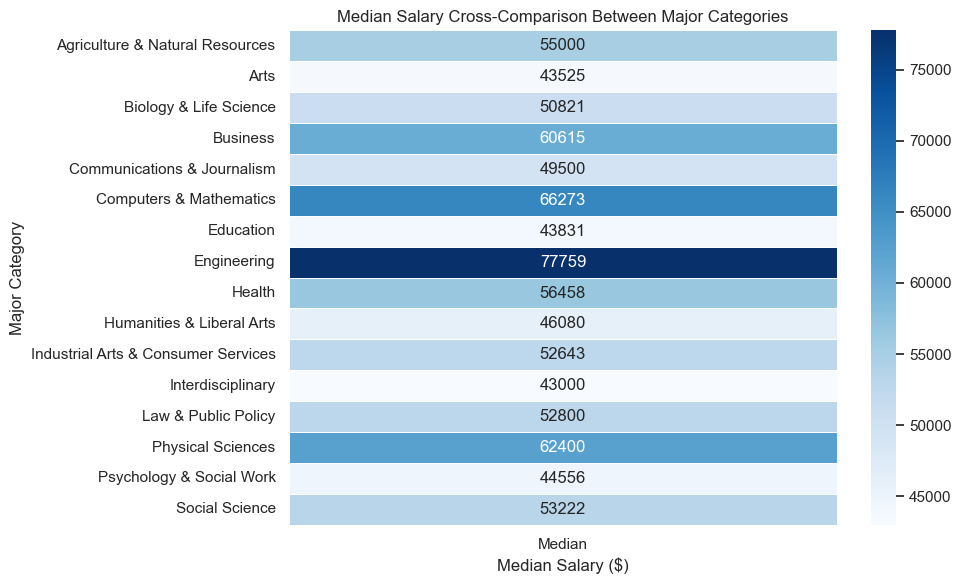


Cross-Comparison of Median Salaries Between Major Categories:
   - The heatmap shows which major categories offer the highest median salaries in whole numbers.
   - Engineering, Computer Science, and Business categories typically offer the highest pay, while fields like Education and Arts generally offer lower median salaries.



In [11]:
# Median salary cross-comparison between major categories
salary_comparison = df.pivot_table(values='Median', index='Major_category', aggfunc='mean')

# Plot heatmap for cross-category comparison of median salary with whole numbers
plt.figure(figsize=(10, 6))
sns.heatmap(salary_comparison, annot=True, fmt=".0f", cmap='Blues', linewidths=0.5)  # fmt=".0f" ensures whole number format
plt.title('Median Salary Cross-Comparison Between Major Categories')
plt.xlabel('Median Salary ($)')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()

# Dynamic explanation for median salary cross-comparison
salary_comparison_explanation = f"""
Cross-Comparison of Median Salaries Between Major Categories:
   - The heatmap shows which major categories offer the highest median salaries in whole numbers.
   - Engineering, Computer Science, and Business categories typically offer the highest pay, while fields like Education and Arts generally offer lower median salaries.
"""
print(salary_comparison_explanation)


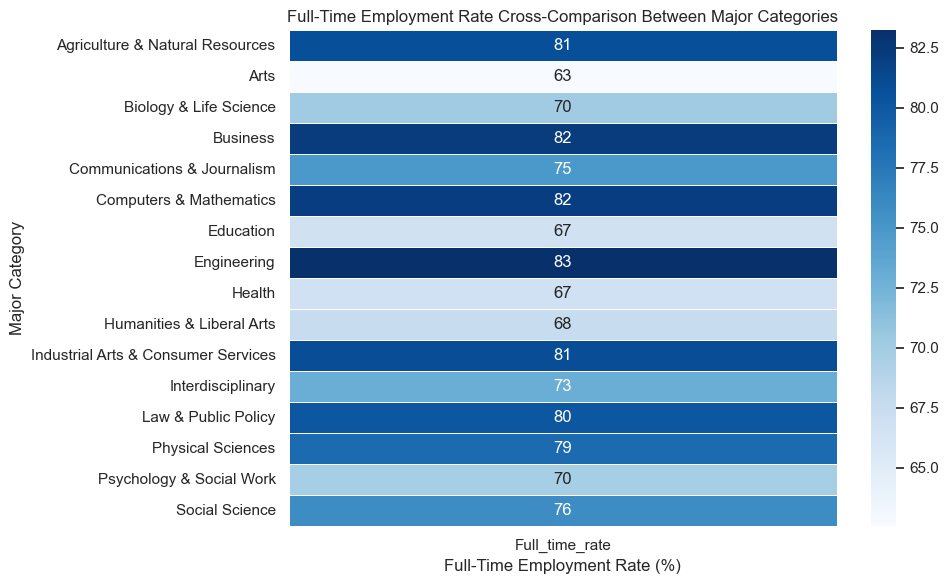


Cross-Comparison of Full-Time Employment Rates Between Major Categories:
   - The heatmap indicates how different major categories fare in terms of full-time employment.
   - Fields such as Engineering, Computer Science, and Health have higher full-time employment rates, while part-time or seasonal employment may be more prevalent in fields like Arts and Humanities.



In [12]:
# Calculate full-time employment rate
df['Full_time_rate'] = (df['Employed_full_time_year_round'] / df['Employed']) * 100

# Full-time employment rate cross-comparison between major categories
full_time_comparison = df.pivot_table(values='Full_time_rate', index='Major_category', aggfunc='mean')

# Plot heatmap for full-time employment rate cross-category comparison
plt.figure(figsize=(10, 6))
sns.heatmap(full_time_comparison, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Full-Time Employment Rate Cross-Comparison Between Major Categories')
plt.xlabel('Full-Time Employment Rate (%)')
plt.ylabel('Major Category')
plt.tight_layout()
plt.show()

# Dynamic explanation for full-time employment rate cross-comparison
full_time_comparison_explanation = f"""
Cross-Comparison of Full-Time Employment Rates Between Major Categories:
   - The heatmap indicates how different major categories fare in terms of full-time employment.
   - Fields such as Engineering, Computer Science, and Health have higher full-time employment rates, while part-time or seasonal employment may be more prevalent in fields like Arts and Humanities.
"""
print(full_time_comparison_explanation)


In [13]:
if 'Major' in df.columns and 'Major_category' in df.columns:
    # Group by the 'Category' column and count occurrences of each Major
    count_by_category = df.groupby('Major_category')['Major'].count()

    # Convert the result to a DataFrame for better visualization
    count_by_category_df = count_by_category.reset_index()
    count_by_category_df.columns = ['Category', 'Major Count']

    # Sort the DataFrame by 'Major Count' in ascending order
    count_by_category_sorted = count_by_category_df.sort_values(by='Major Count', ascending=False)

    print(count_by_category_sorted)
else:
    print("The columns 'Major' and 'Category' do not exist in the Excel file.")

                               Category  Major Count
7                           Engineering           29
6                             Education           16
9             Humanities & Liberal Arts           15
2                Biology & Life Science           14
3                              Business           13
8                                Health           12
5               Computers & Mathematics           11
0       Agriculture & Natural Resources           10
13                    Physical Sciences           10
14             Psychology & Social Work            9
15                       Social Science            9
1                                  Arts            8
10  Industrial Arts & Consumer Services            7
12                  Law & Public Policy            5
4           Communications & Journalism            4
11                    Interdisciplinary            1


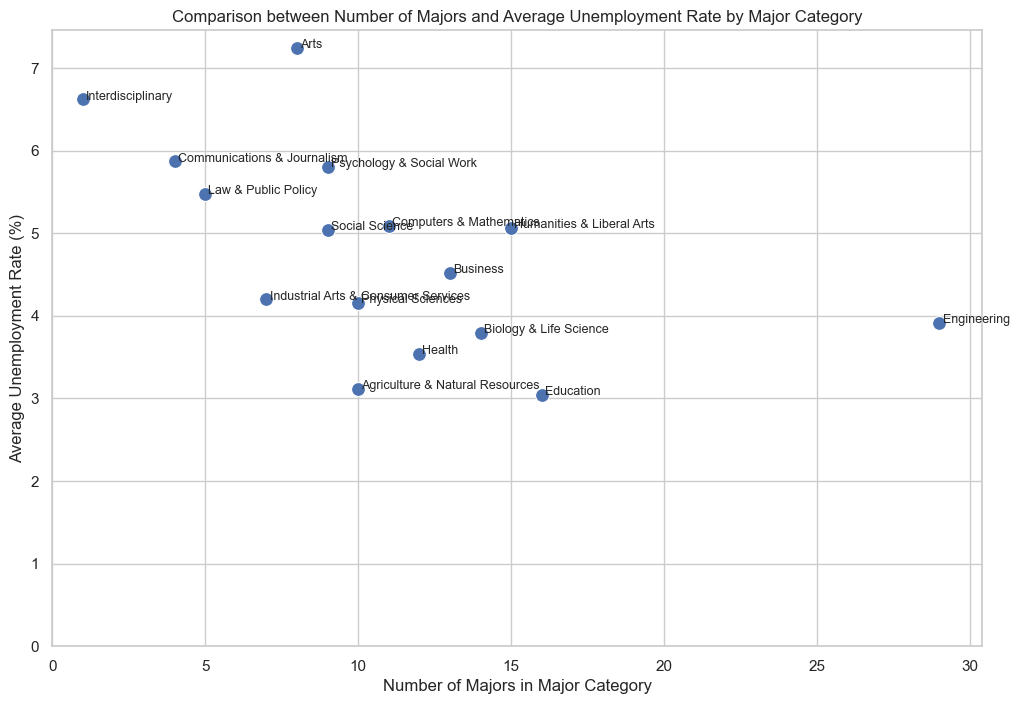

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count the number of majors in each major category
majors_count = df.groupby('Major_category')['Major'].count()

# Step 2: Calculate the average unemployment rate for each major category
avg_unemployment_rate = df.groupby('Major_category')['Unemployment_rate'].mean()

# Step 3: Create a DataFrame combining the count of majors and average unemployment rate
comparison_df = pd.DataFrame({
    'Major Category': majors_count.index,
    'Number of Majors': majors_count.values,
    'Average Unemployment Rate': avg_unemployment_rate.values
})

# Step 4: Plot a scatter plot with labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=comparison_df, x='Number of Majors', y='Average Unemployment Rate', s=100)

# Annotate each point with the major category and rotate the text
for i in range(comparison_df.shape[0]):
    plt.text(
        comparison_df['Number of Majors'][i] + 0.1,  # X-coordinate with slight offset
        comparison_df['Average Unemployment Rate'][i],  # Y-coordinate
        comparison_df['Major Category'][i],  # Label (Major Category)
        fontsize=13,  # Set font size to 12 for annotations
        rotation=40  # Rotate the text by 45 degrees
    )

# Set the title and axis labels with font size 12
plt.title('Comparison between Number of Majors and Average Unemployment Rate by Major Category', fontsize=12)
plt.xlabel('Number of Majors in Major Category', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)

# Ensure the plot starts from 0 on both axes
plt.xlim(0)
plt.ylim(0)

plt.grid(True)
plt.show()


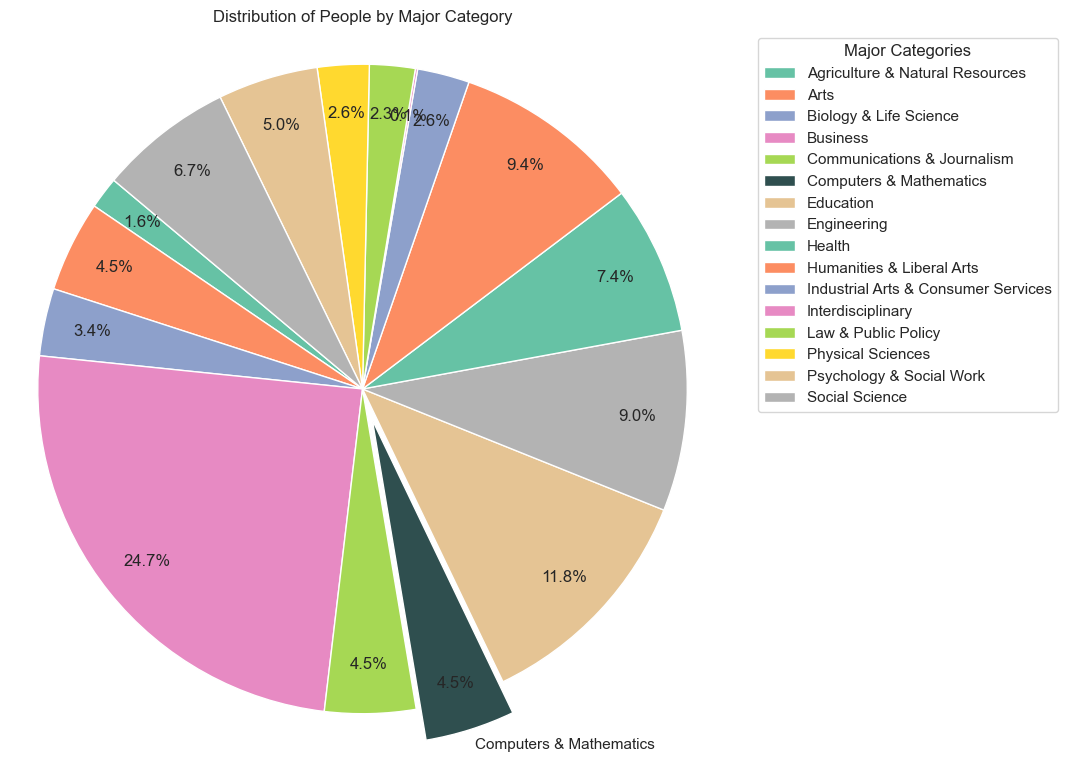

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Major_category' and sum the 'Total' number of people in each category
category_totals = df.groupby('Major_category')['Total'].sum()

# Find index of "Computers & Mathematics"
explode = [0.1 if category == "Computers & Mathematics" else 0 for category in category_totals.index]

# Set colors: dark for "Computers & Mathematics" and light for others
colors = ['darkslategray' if category == "Computers & Mathematics" else color 
          for category, color in zip(category_totals.index, sns.color_palette('Set2', len(category_totals)))]

# Set labels: only "Computers & Mathematics" will have a label, others will not
labels = ['Computers & Mathematics' if category == "Computers & Mathematics" else '' for category in category_totals.index]

# Custom autopct to show percentage only for "Computers & Mathematics"
def custom_autopct(pct, category):
    if category == "Computers & Mathematics":
        return f'{pct:.1f}%'
    else:
        return ''

# Plot pie chart with adjustments
plt.figure(figsize=(10, 8))
plt.pie(category_totals, labels=labels, 
        autopct=lambda pct: custom_autopct(pct, "Computers & Mathematics" if pct > 0 else ""), 
        startangle=140, explode=explode, colors=colors, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
        pctdistance=0.85, labeldistance=1.05)

# Add legend for all major categories
plt.legend(category_totals.index, title="Major Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribution of People by Major Category')
plt.tight_layout()
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()
